In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Data/NSE-TATAGLOBAL.csv")

In [ ]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

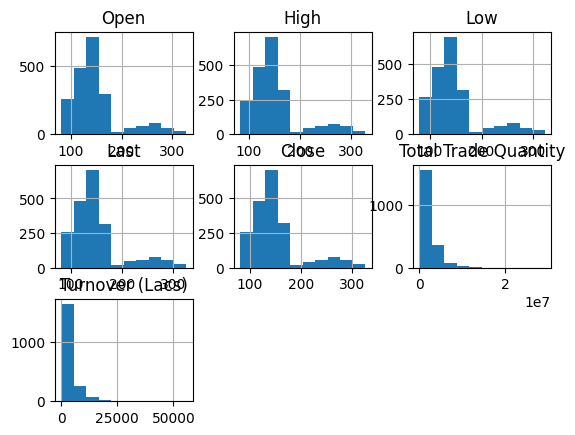

In [ ]:
data.hist()
sns.set(rc={'figure.figsize':(20,7)})

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
srt=data.sort_values(by ='Date')

In [ ]:
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
pd.to_datetime(srt['Date'])

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
          ...    
4      2018-09-24
3      2018-09-25
2      2018-09-26
1      2018-09-27
0      2018-09-28
Name: Date, Length: 2035, dtype: datetime64[ns]

In [ ]:
srt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 143.1+ KB


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
srt.shape

(2035, 9)

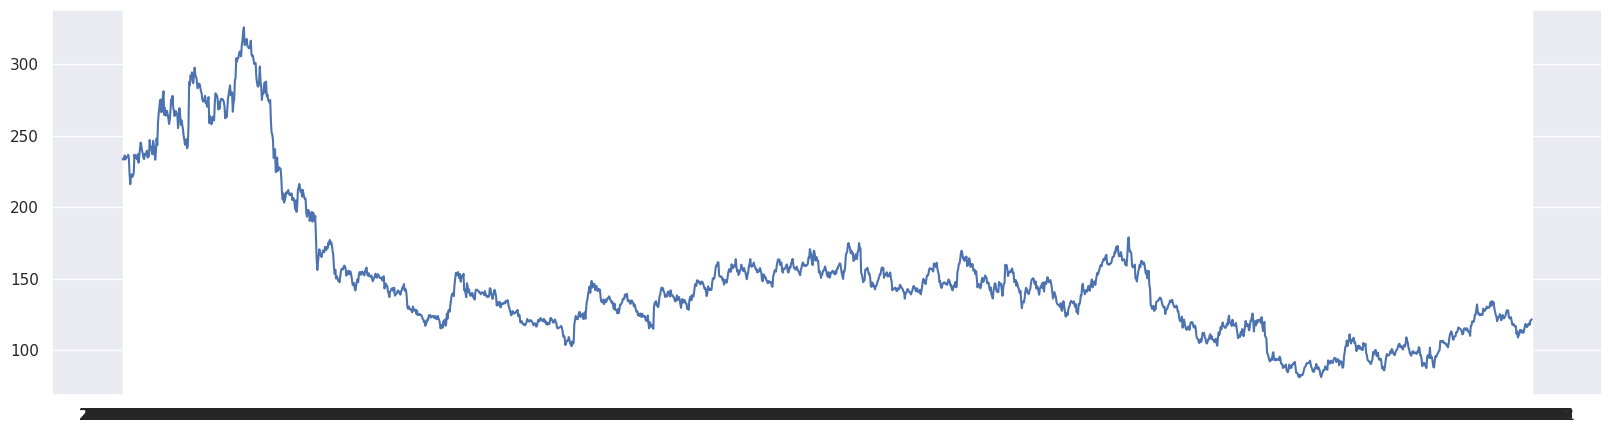

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data['Date'],data['Close'])

In [ ]:
srt.isnull().sum()

index                   0
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
close_srt=srt['Close']
close_srt

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

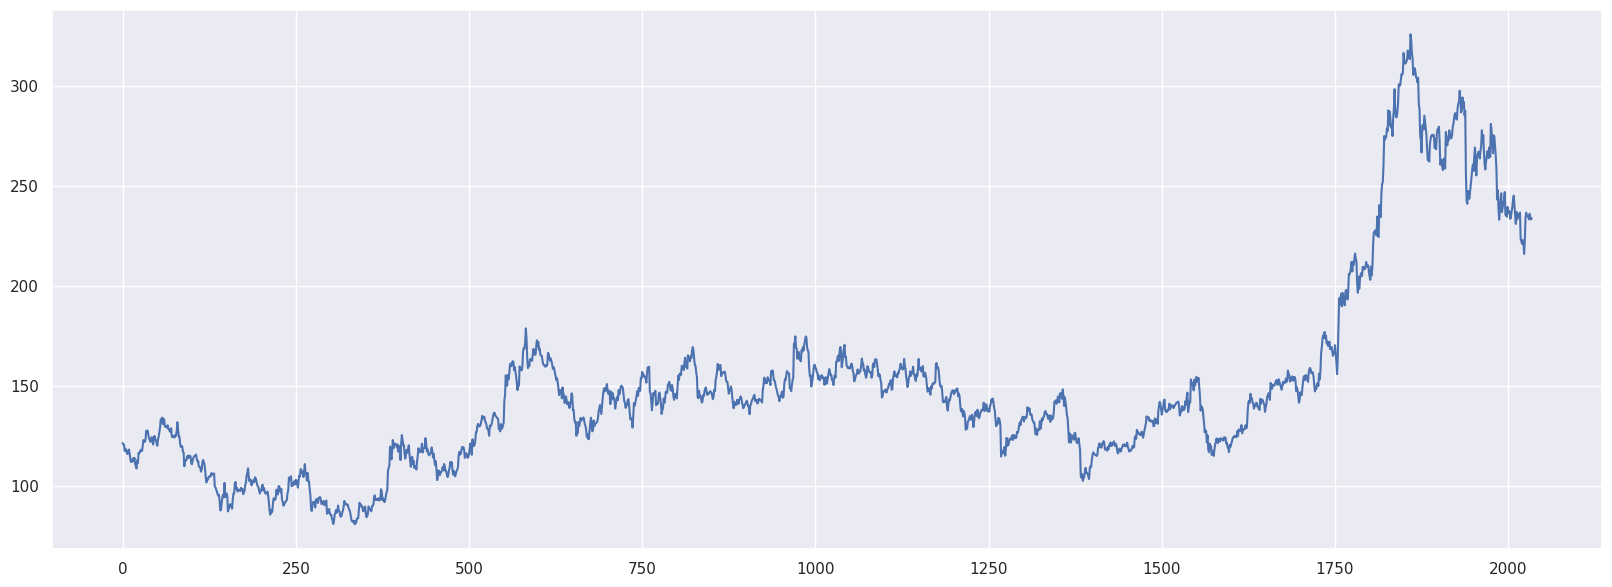

In [ ]:
plt.plot(close_srt)

Feature Scaling (MinMax Scaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt=scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])


Splitting the dataset

In [ ]:

train_size=int(len(close_srt)*0.7)
test_size=len(close_srt)-train_size
train_data,test_data=close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

Convert array of values into a dataset matrix

In [ ]:
def create_dataset (dataset ,time_step=1):
    dataX ,dataY =[],[]
    for i in range (len(dataset)-time_step-1):
        a =dataset [i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

Reshaping of dataset

In [ ]:
#shaping of dataset
time_step=100
X_train,y_train=create_dataset(train_data ,time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape) , print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [ ]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.15951797],
        [0.16707516],
        [0.15992647],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.16707516],
        [0.15992647],
        [0.16053922],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]],

       ...,

       [[0.86519608],
        [0.84027778],
        [0.84497549],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.84027778],
        [0.84497549],
        [0.87111928],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.84497549],
        [0.87111928],
        [0.85273693],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

Creating the stacked LSTM Model

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 3s 176ms/step - loss: 1.8125e-04 - val_loss: 1.8030e-04
Epoch 2/60
19/19 [==============================] - 3s 178ms/step - loss: 1.7693e-04 - val_loss: 1.4965e-04
Epoch 3/60
19/19 [==============================] - 5s 270ms/step - loss: 1.7413e-04 - val_loss: 1.9781e-04
Epoch 4/60
19/19 [==============================] - 3s 175ms/step - loss: 1.9758e-04 - val_loss: 1.6331e-04
Epoch 5/60
19/19 [==============================] - 3s 171ms/step - loss: 1.7771e-04 - val_loss: 1.5504e-04
Epoch 6/60
19/19 [==============================] - 3s 176ms/step - loss: 1.6874e-04 - val_loss: 1.4033e-04
Epoch 7/60
19/19 [==============================] - 5s 280ms/step - loss: 1.6812e-04 - val_loss: 1.4396e-04
Epoch 8/60
19/19 [==============================] - 3s 172ms/step - loss: 1.6138e-04 - val_loss: 1.3861e-04
Epoch 9/60
19/19 [==============================] - 3s 174ms/step - loss: 1.7731e-04 - val_loss: 1.3801e-04
Epoch 10/60
19/19 [=========

Predicting

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 38ms/step


In [ ]:
trian_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

calculating the performance

In [ ]:
import math as mt
from sklearn.metrics import mean_squared_error

In [ ]:
mt.sqrt(mean_squared_error(y_train,train_predict))

0.013333183405322512

In [ ]:
mt.sqrt(mean_squared_error(y_test,test_predict))

206.99067125684562

Plotting the graph with predicted train data, test data with actual data

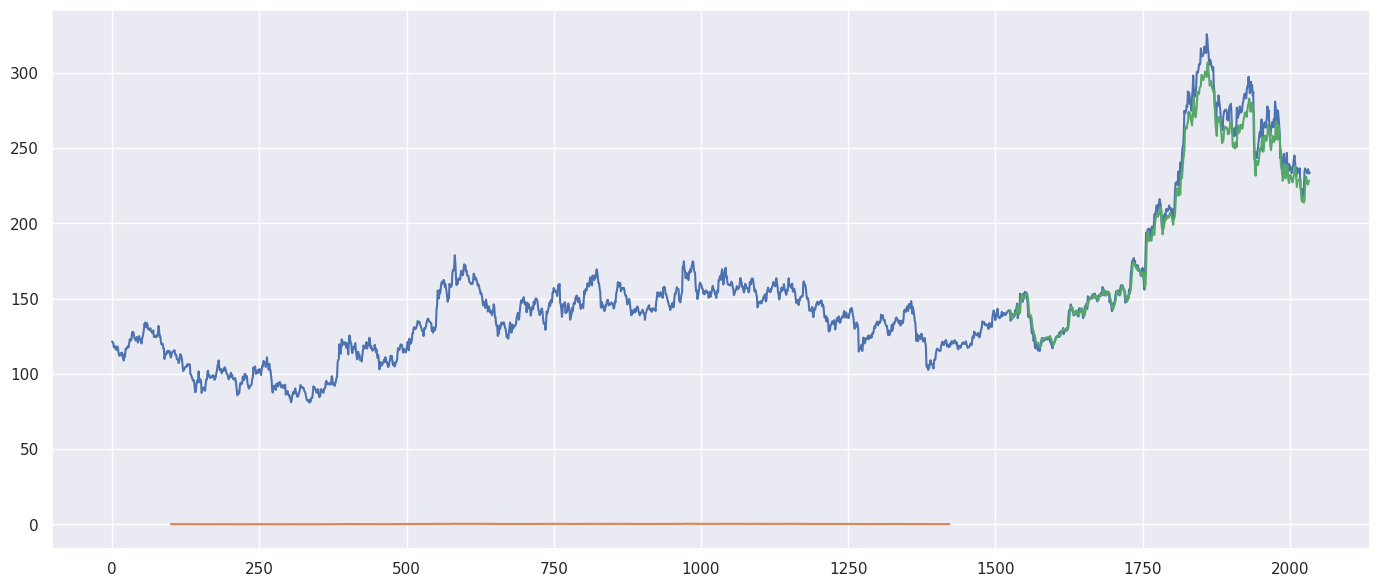

In [ ]:
look_back=100

# shift train predictions for plotting
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

# shift test predictions for ploting
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :]=test_predict

# plot baseline and predictions
plt.figure(figsize=(17,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction for next 30 days

In [ ]:
len(test_data)

611

In [ ]:
pred_input=test_data[271:].reshape(1,-1)
pred_input.shape

(1, 340)

In [ ]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.2800245098039216,
 0.27308006535947715,
 0.2606209150326797,
 0.24816176470588225,
 0.2536764705882353,
 0.26940359477124187,
 0.26327614379084974,
 0.26388888888888895,
 0.27961601307189543,
 0.2918709150326797,
 0.3018790849673202,
 0.30228758169934633,
 0.29432189542483655,
 0.3047385620915033,
 0.30085784313725483,
 0.30004084967320266,
 0.2906454248366013,
 0.30841503267973847,
 0.3165849673202614,
 0.31924019607843135,
 0.31556372549019607,
 0.3082107843137255,
 0.31004901960784315,
 0.3098447712418301,
 0.30147058823529416,
 0.2867647058823529,
 0.2712418300653594,
 0.2785947712418301,
 0.27593954248366015,
 0.2847222222222222,
 0.28860294117647056,
 0.28227124183006536,
 0.30718954248366015,
 0.29575163398692805,
 0.3137254901960784,
 0.3496732026143792,
 0.3617238562091504,
 0.3790849673202614,
 0.3858251633986929,
 0.38092320261437906,
 0.39236111111111116,
 0.3790849673202614,
 0.3848039215686274,
 0.36907679738562094,
 0.3727532679738561,
 0.3637663398692811,
 0.36846405